In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_csv('cardekho.csv')
df = car.copy()

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [7]:
df.shape

(7907, 12)

In [8]:
pd.set_option('display.max_rows',None)

In [9]:
temp = df['name'].value_counts()
temp

name
Maruti Swift Dzire VDI                                    129
Maruti Alto 800 LXI                                        82
Maruti Alto LXi                                            71
BMW X4 M Sport X xDrive20d                                 62
Maruti Swift VDI                                           61
Maruti Wagon R LXI                                         53
Maruti Alto K10 VXI                                        50
Hyundai EON Era Plus                                       48
Maruti Ertiga VDI                                          45
Maruti Wagon R VXI BS IV                                   45
Maruti Alto LX                                             44
Toyota Innova 2.5 VX (Diesel) 7 Seater                     44
Maruti Ritz VDi                                            42
Maruti Swift Dzire VXI                                     38
Tata Safari Storme EX                                      38
Maruti 800 AC                                              38
Mar

In [10]:
threshold = 10
temp = temp[temp > 10]

In [11]:
df = df[df['name'].isin(temp.index)]

In [12]:
df.shape

(3316, 12)

In [13]:
df = df.reset_index().drop(columns='index')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.0,108.45,5.0
2,Maruti Swift Dzire VDi,2009,280000,140000,Diesel,Individual,Manual,Second Owner,19.30,1248.0,73.9,5.0
3,Maruti Wagon R LXI Minor,2009,180000,90000,Petrol,Individual,Manual,Second Owner,18.90,1061.0,67,5.0
4,Maruti Ertiga SHVS VDI,2016,778000,70000,Diesel,Individual,Manual,Second Owner,24.52,1248.0,88.5,7.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                3316 non-null   object 
 1   year                3316 non-null   int64  
 2   selling_price       3316 non-null   int64  
 3   km_driven           3316 non-null   int64  
 4   fuel                3316 non-null   object 
 5   seller_type         3316 non-null   object 
 6   transmission        3316 non-null   object 
 7   owner               3316 non-null   object 
 8   mileage(km/ltr/kg)  3316 non-null   float64
 9   engine              3316 non-null   float64
 10  max_power           3316 non-null   object 
 11  seats               3316 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 311.0+ KB


In [15]:
df['year'] = pd.to_datetime(df['year'])

In [16]:
df.select_dtypes(['int64','float64']).corr()

,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
selling_price,1.000000,-0.208499,-0.155278,0.527435,-0.000324
km_driven,-0.208499,1.000000,-0.100074,0.108753,0.194915
mileage(km/ltr/kg),-0.155278,-0.100074,1.000000,-0.504691,-0.424911
engine,0.527435,0.108753,-0.504691,1.000000,0.563348
seats,-0.000324,0.194915,-0.424911,0.563348,1.000000


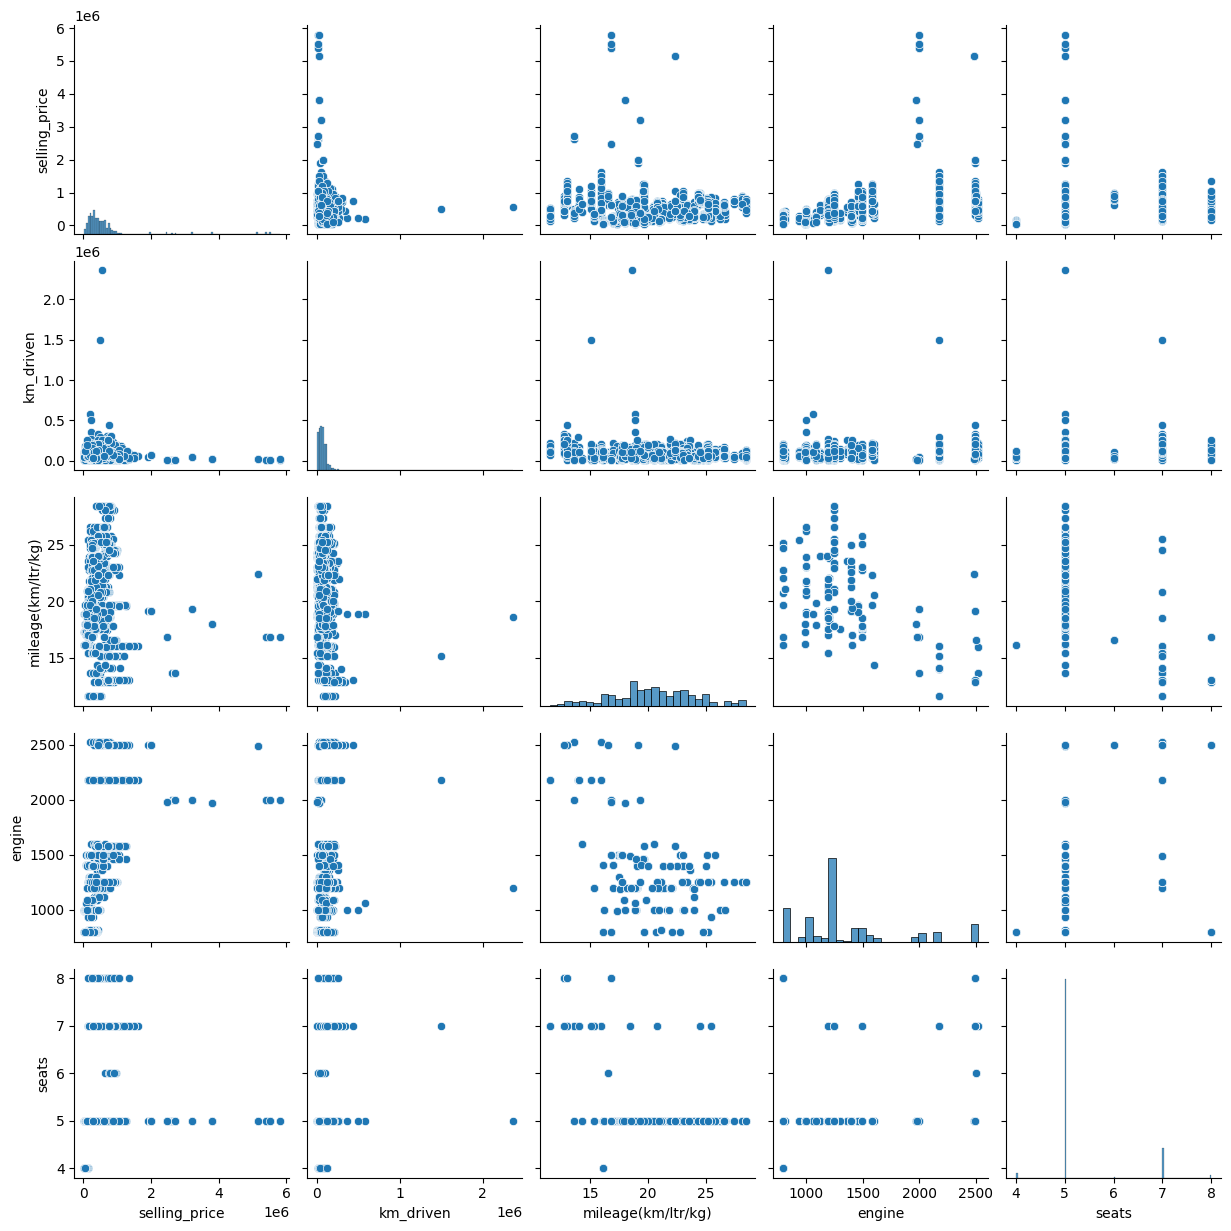

In [17]:
sns.pairplot(df.select_dtypes(['int64','float64']))

In [18]:
df['year'] = df['year'].dt.year

In [19]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,1970,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Renault Duster 110PS Diesel RxL,1970,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.0,108.45,5.0


In [20]:
X = df.drop(columns='selling_price')
X.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,1970,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Renault Duster 110PS Diesel RxL,1970,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.0,108.45,5.0


In [21]:
y = df['selling_price']
y.head()

0    450000
1    500000
2    280000
3    180000
4    778000
Name: selling_price, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [24]:
transformer = ColumnTransformer(transformers=[
    ('encoding',OneHotEncoder(sparse_output=False,drop='first'),[0,3,4,5,6])
],remainder='passthrough')

In [25]:
transformer2 = ColumnTransformer(transformers=[
    ('scale',StandardScaler(),slice(0,None))
],remainder='passthrough')

In [26]:
transformer3 = LinearRegression()

In [27]:
pipeline = Pipeline([
    ('encoding',transformer),
    ('scaling',transformer2),
    ('model',transformer3)
])

In [28]:
pipeline.fit(X_train,y_train)

,steps,"[('encoding', ...), ('scaling', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoding', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_pred = pipeline.predict(X_test)


In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9925731187613538

In [31]:
import pickle

In [33]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [38]:
X_test.iloc[[1],:]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
1962,Maruti Swift VDI,1970,23000,Diesel,Individual,Manual,First Owner,28.4,1248.0,74,5.0


In [40]:
y_test.iloc[[1]]

1962    675000
Name: selling_price, dtype: int64

In [52]:
X_test.iloc[[1],:].values

array([['Maruti Swift VDI', 1970, 23000, 'Diesel', 'Individual',
        'Manual', 'First Owner', 28.4, 1248.0, '74', 5.0]], dtype=object)

In [50]:
pd.DataFrame([{'name':'Maruti','year':1950,'km_driven':2000,'fuel':'Diesel','seller_type':'Individual','transmission':'Manual','owner':'First Owner'}])

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti,1950,2000,Diesel,Individual,Manual,First Owner


In [79]:
X_train['max_power'].unique()

array(['46.3', '47.3', '73.97', '74', '78.9', '177', '62', '69', '74.02',
       '88.5', '140', '84', '69.01', '67', '68', '214.56', '98.6', '190',
       '37', '67.04', '100', '73.9', '88.7', '55.2', '62.1', '78', '80',
       '157.7', '100.6', '88.8', '73', '108.45', '68.05', '102', '88.76',
       '81.8', '98.59', '117.3', '105', '53.3', '147.94', '70', '67.05',
       '150', '73.94', '75', '85.8', '67.1', '81.83', '126.32', '82.85',
       '88.73', '57.6', '98.96', '90', '103.6', '83.14', '66.1', '82',
       '34.2', '103.5', '63', '126.2', '61.7', '126.3', '81.86', '79.4',
       '76.8', '56.3', '138.1', '60', '83.1', '58.2', '58.16', '53.26'],
      dtype=object)

In [84]:
pipeline.predict(X_test.iloc[[1],:].values)[0]

/home/mahtab-ahmad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


np.float64(601897.0897704163)

In [62]:
len(list(X['name'].values))

3316

In [83]:
a = 232
b = 323
np.array([[a ,b]])

array([[232, 323]])